In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cost-of-international-education/International_Education_Costs.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/cost-of-international-education/International_Education_Costs.csv')
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,France,Strasbourg,University of Strasbourg,Data Analytics,Master,2.0,4000,70.2,1000,99,850,0.92
903,Malaysia,Nilai,USIM,Computer Science,Bachelor,3.0,6800,50.5,400,120,400,4.65
904,Saudi Arabia,Al-Ahsa,King Faisal University,Information Systems,Master,2.0,4200,64.2,600,200,800,3.75
905,USA,Seattle,University of Washington,Software Development,PhD,5.0,50000,77.8,2000,160,1500,1.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [4]:
df.describe(include='all')

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907,907,907,907,907,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
unique,71,556,622,92,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UK,Singapore,University of Washington,Computer Science,Master,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,18,6,312,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,NaN,NaN,NaN,NaN,NaN,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,NaN,NaN,NaN,NaN,NaN,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,NaN,NaN,NaN,NaN,NaN,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000


In [5]:
df.isna().sum()

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

In [6]:
df.shape

(907, 12)

# Vizualization Section

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
cols = ['Country', 'Program', 'Level', 'Duration_Years', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate']

# Count plot

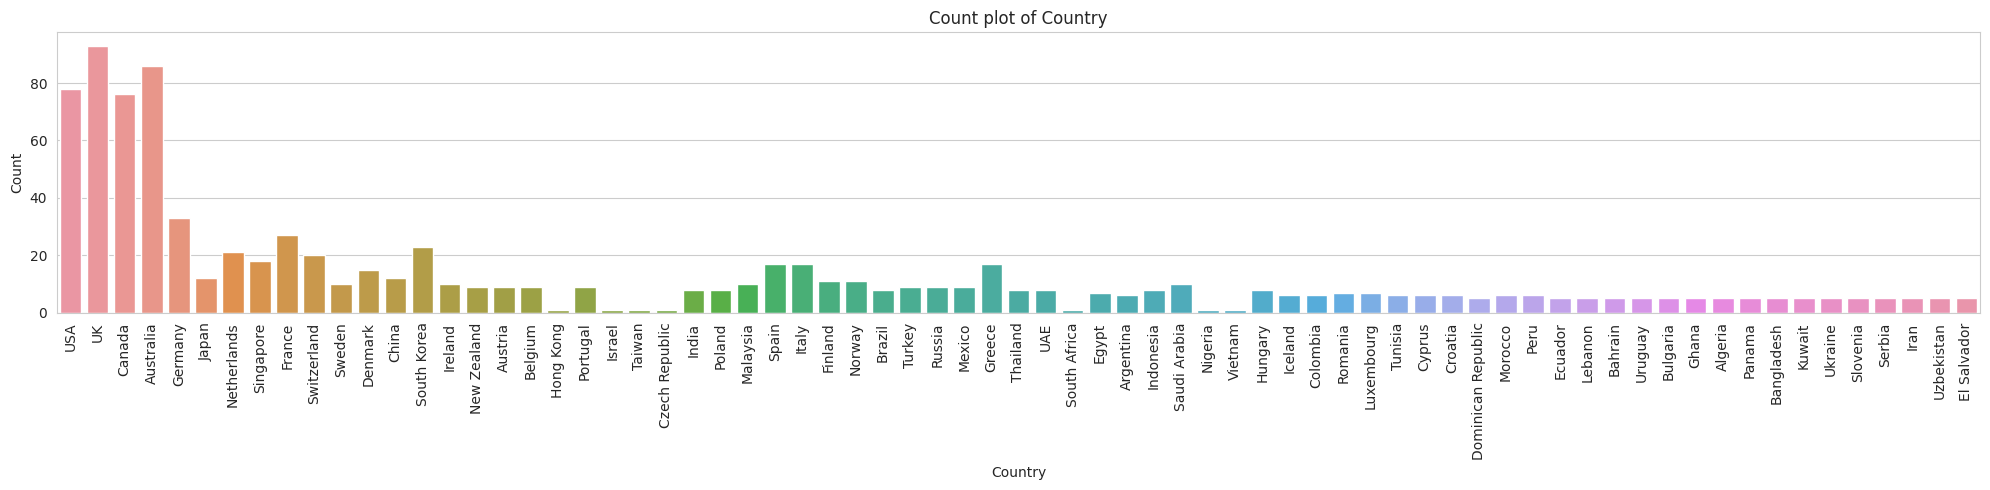

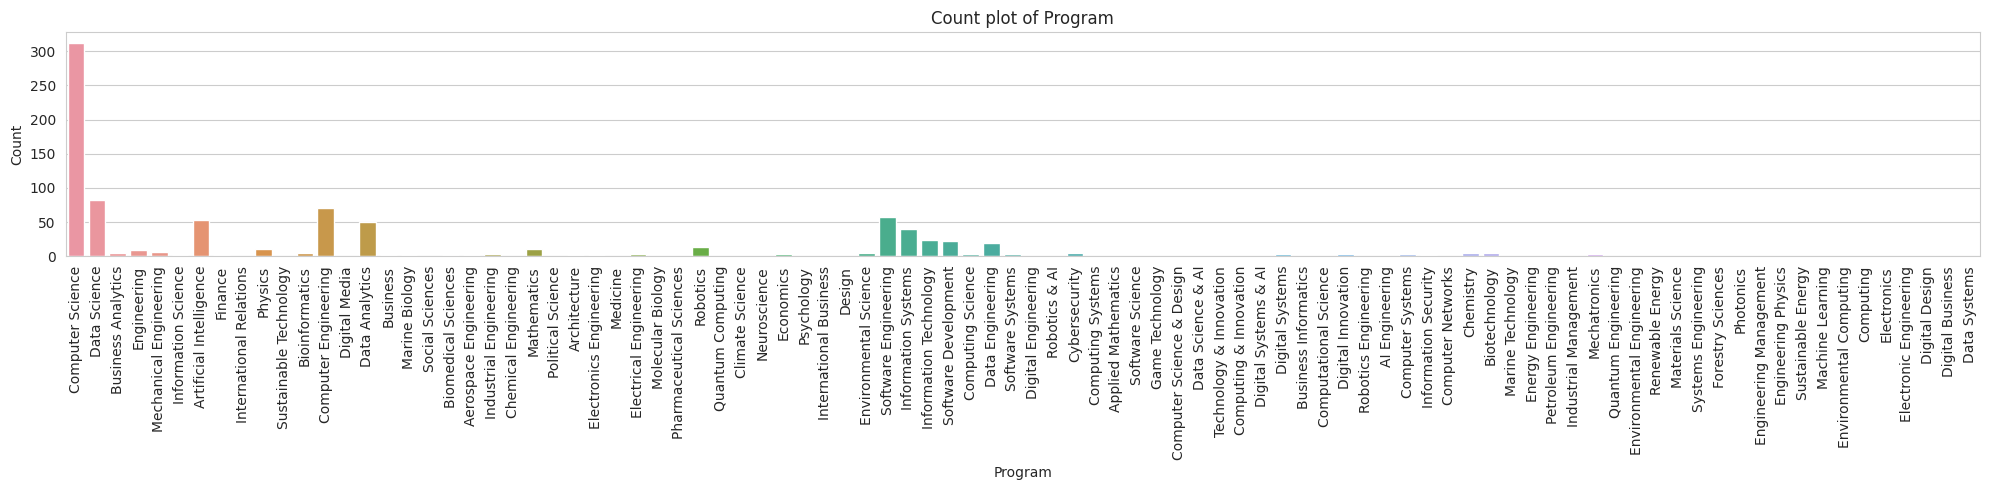

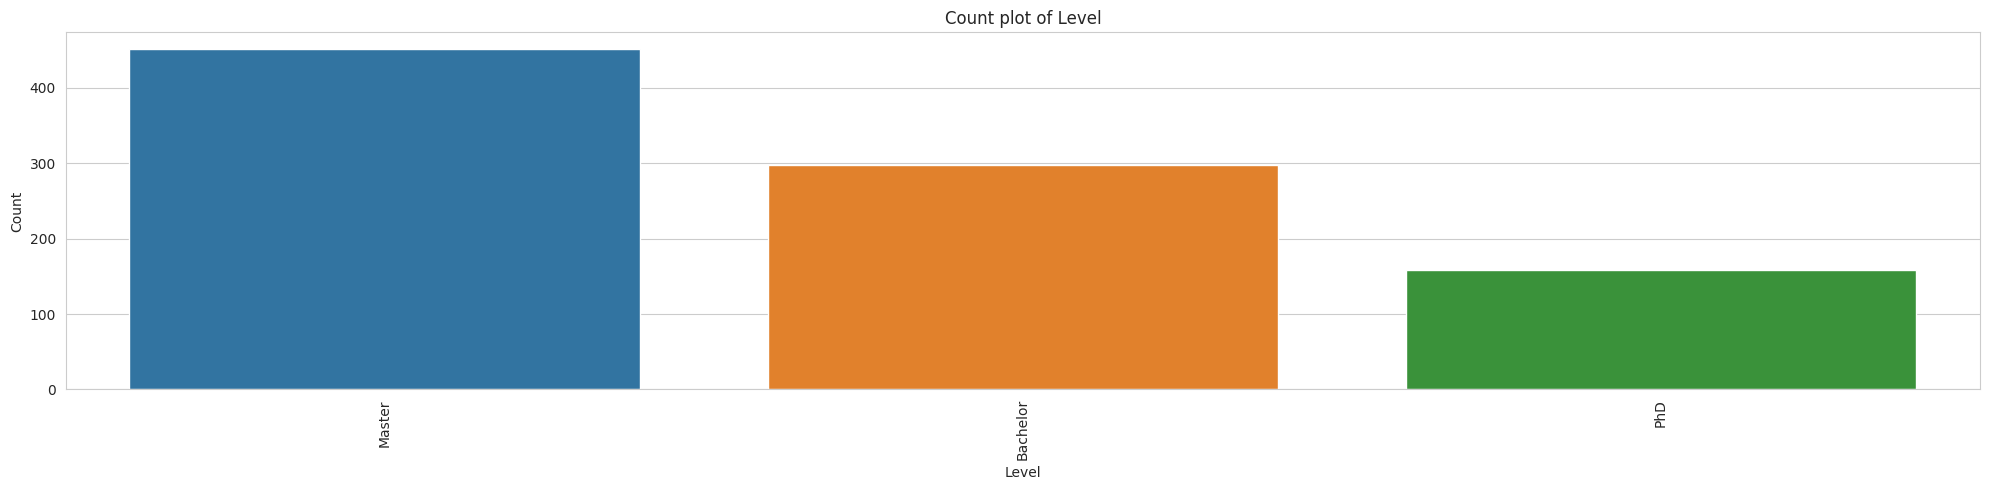

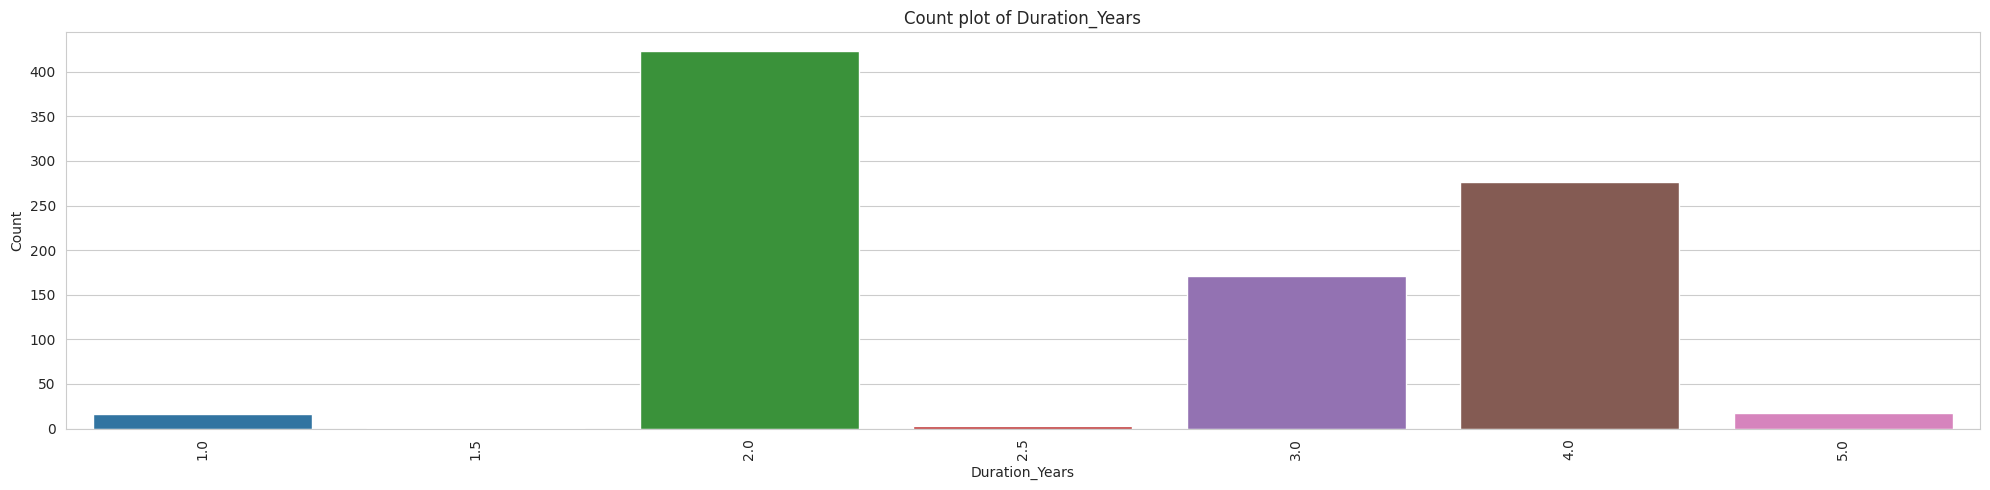

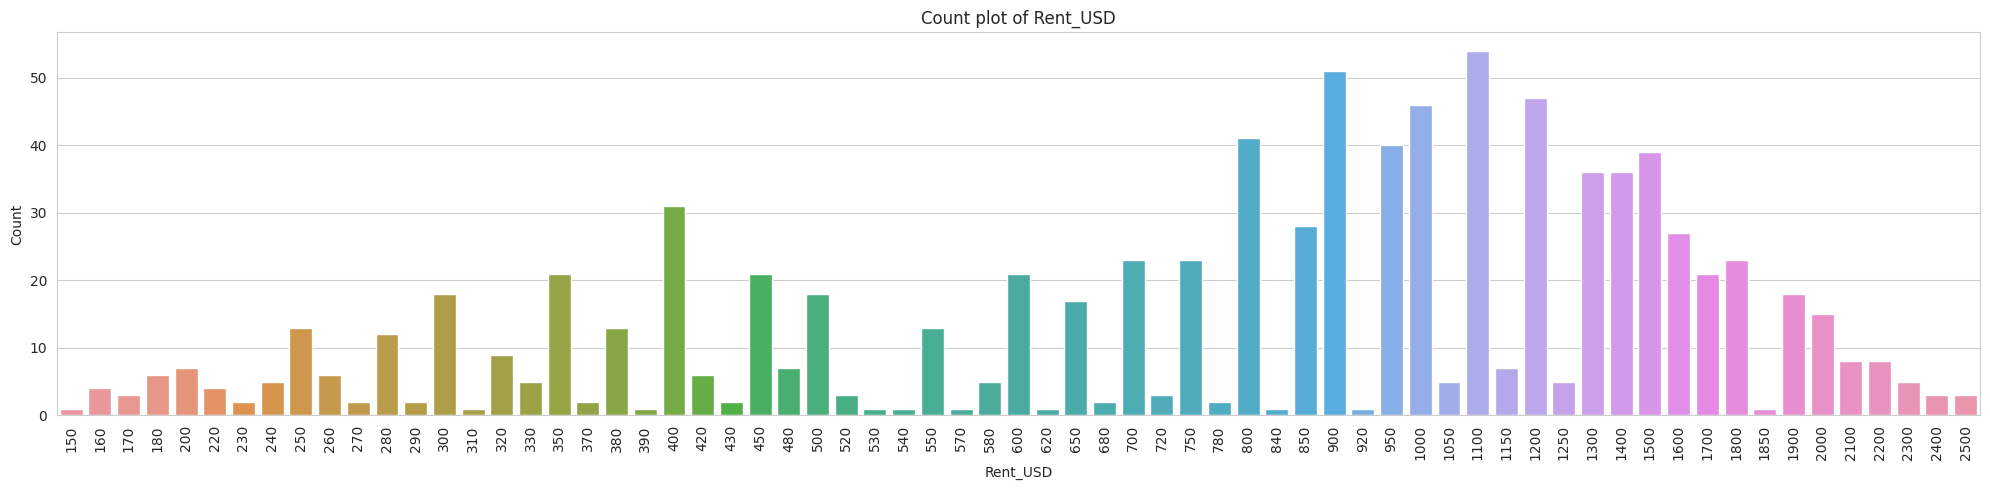

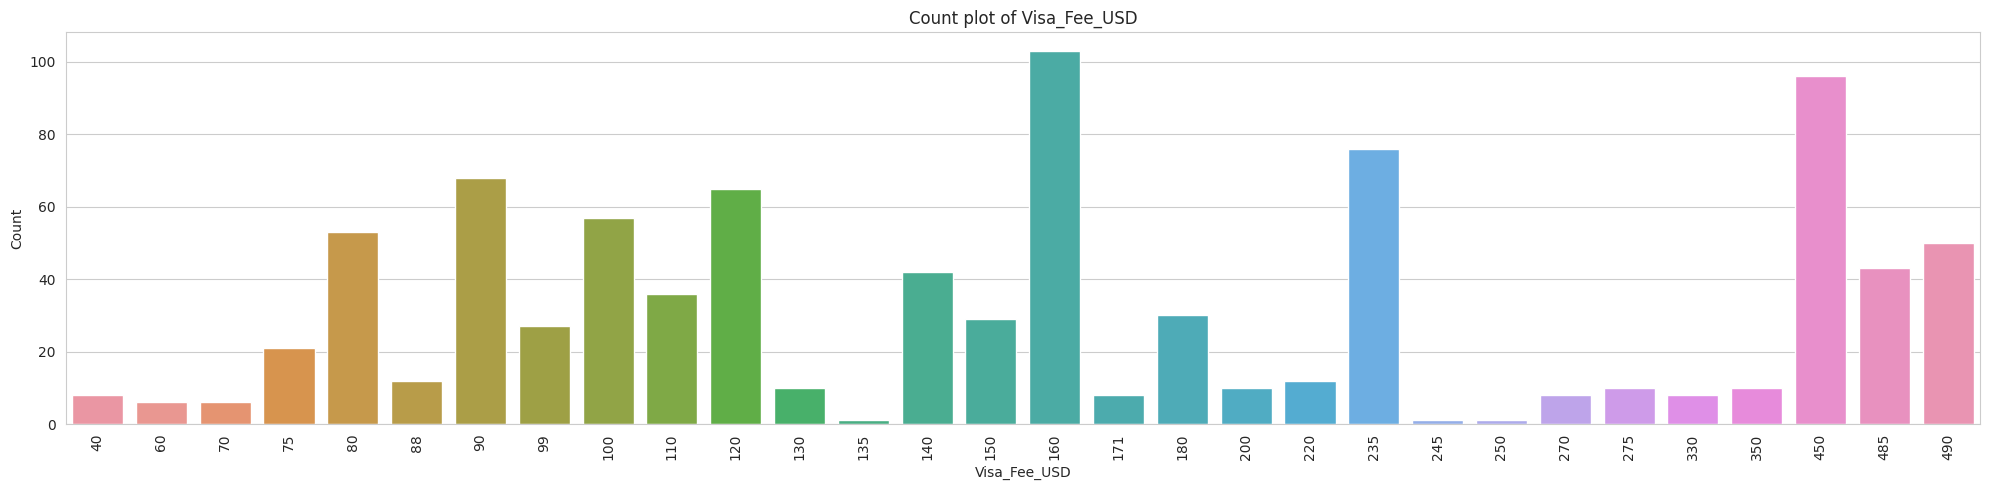

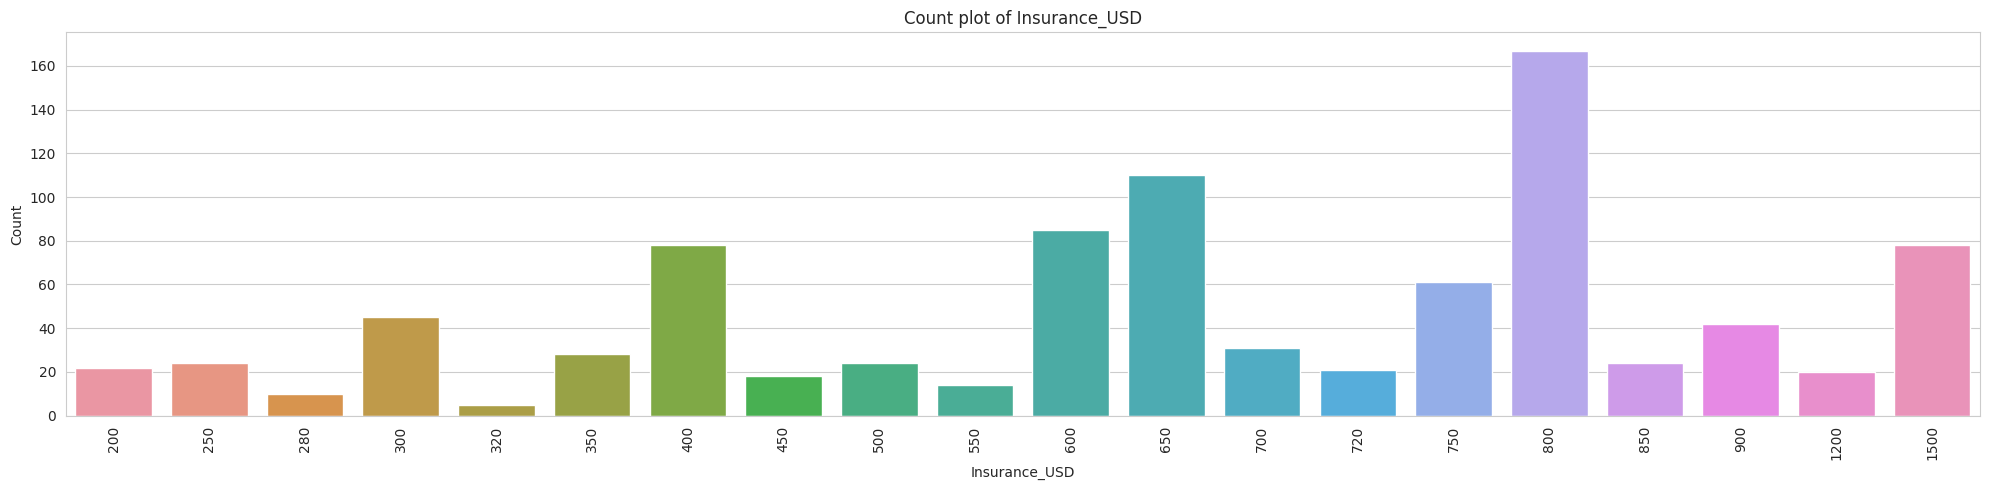

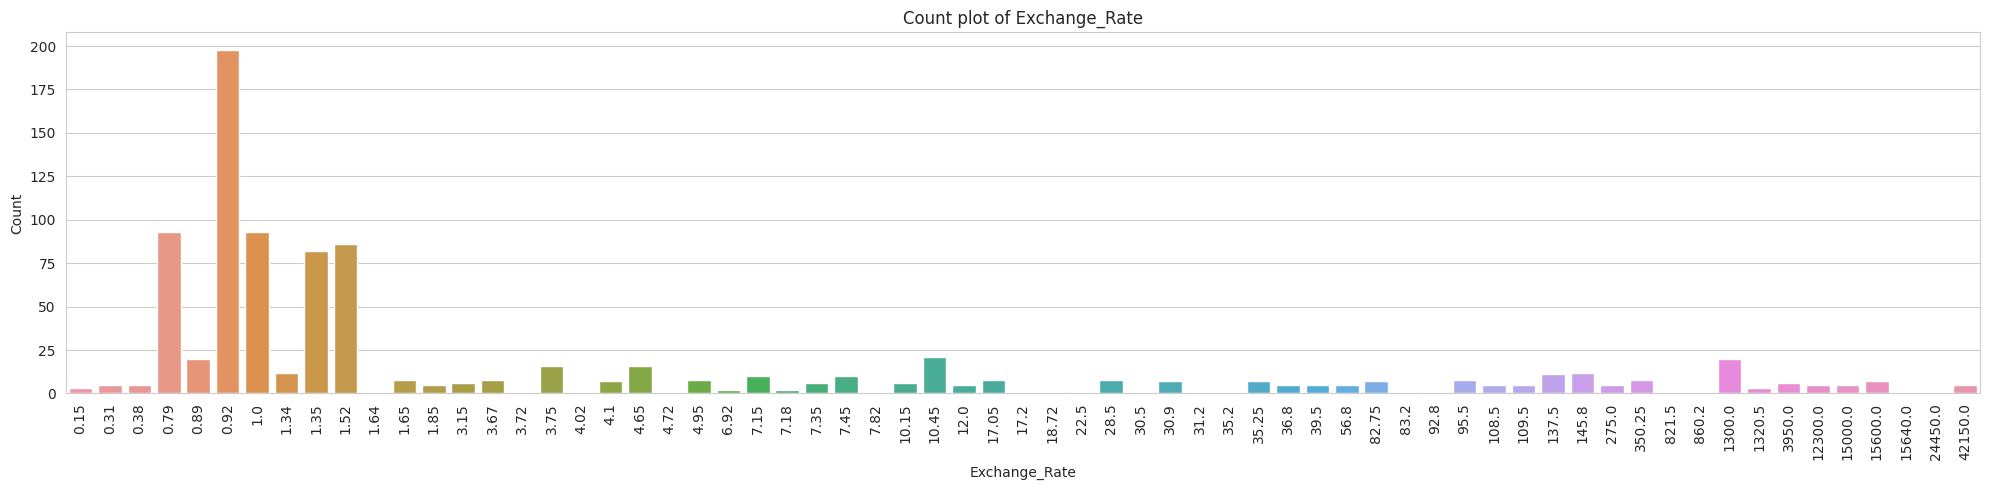

In [9]:
sns.set_style('whitegrid')

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [10]:
cols2 = ['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate']

# Histogram

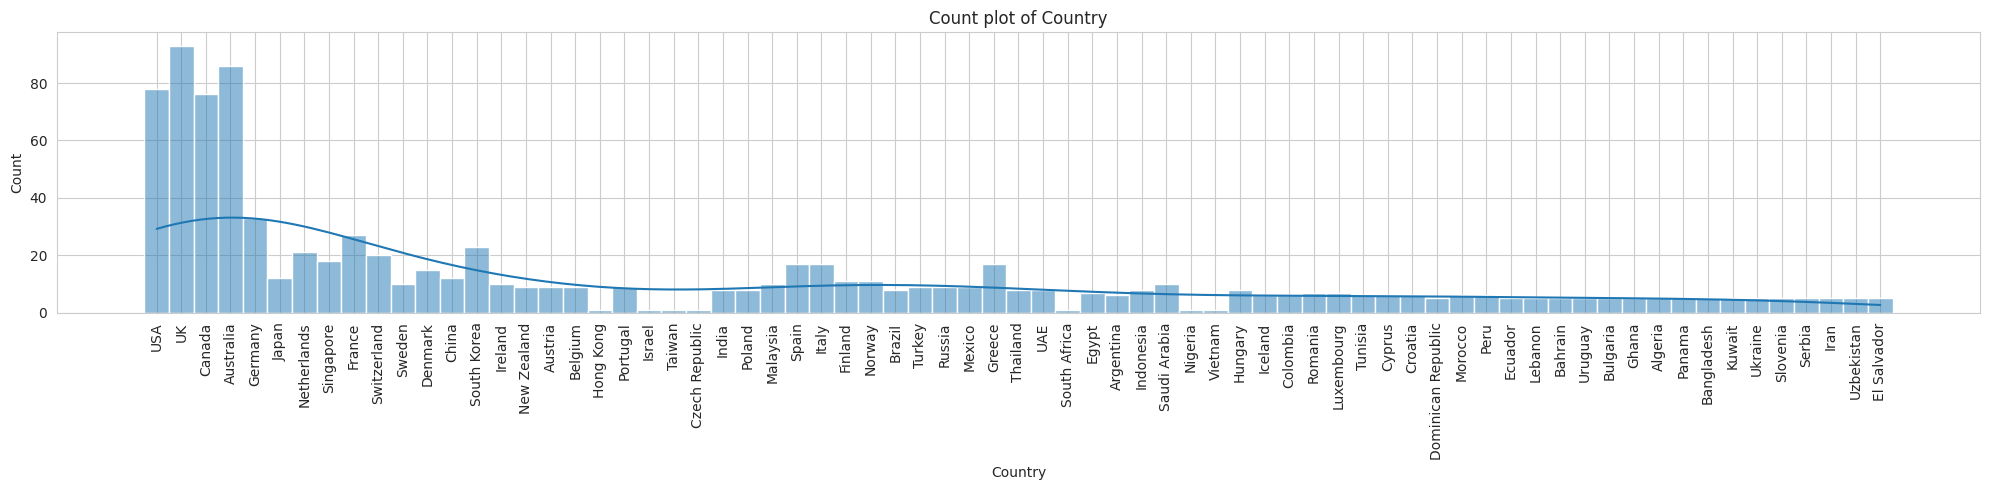

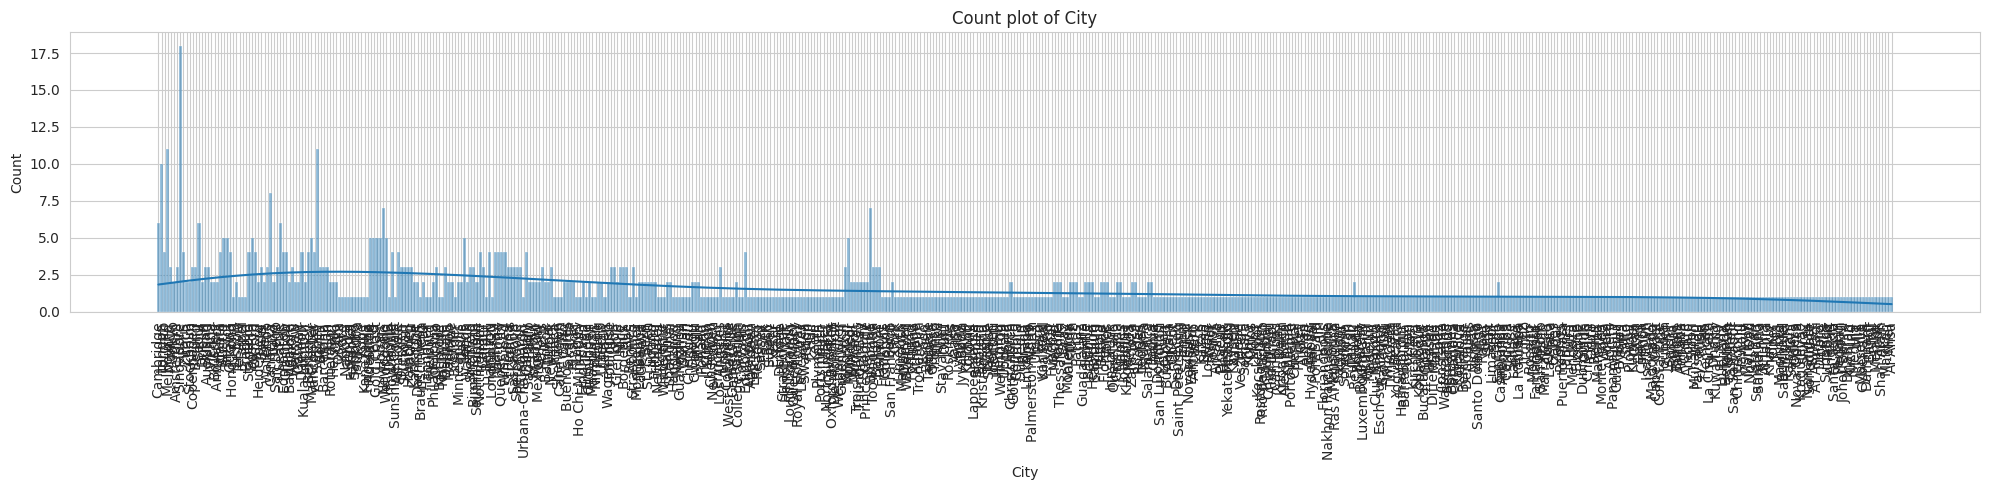

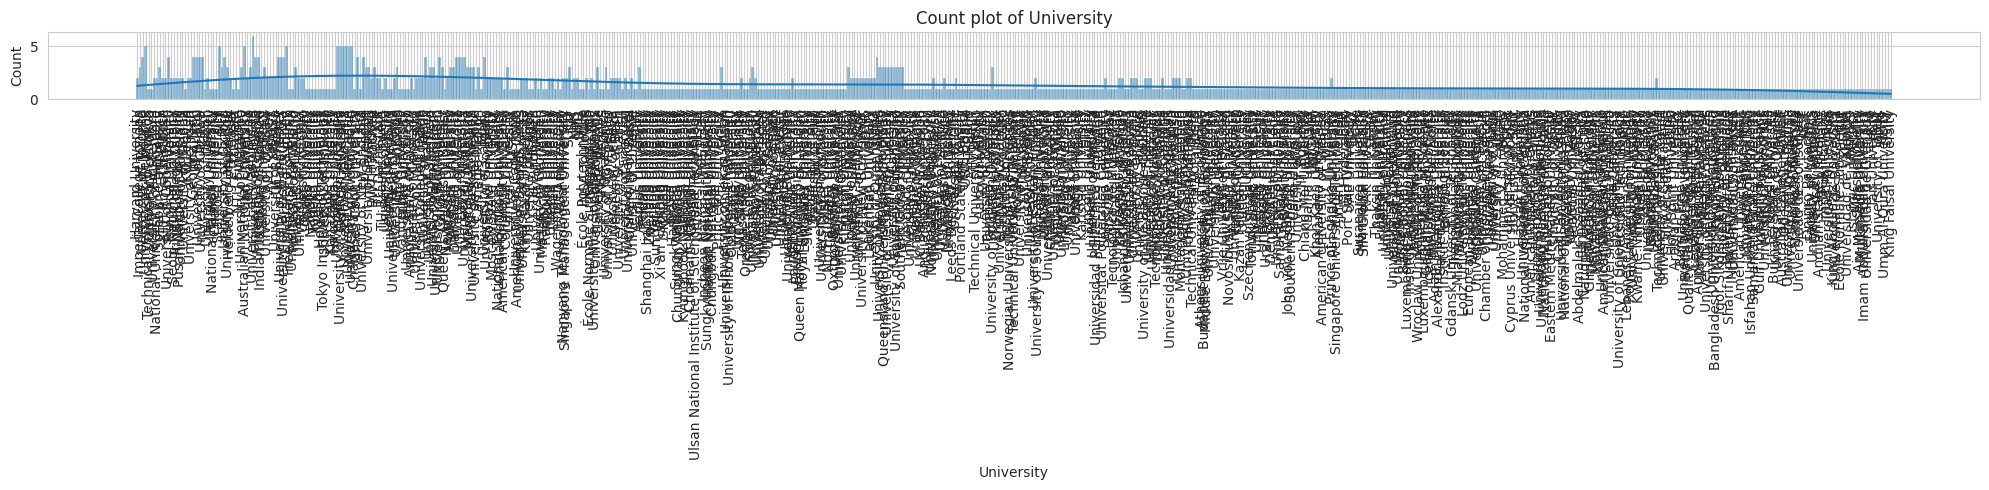

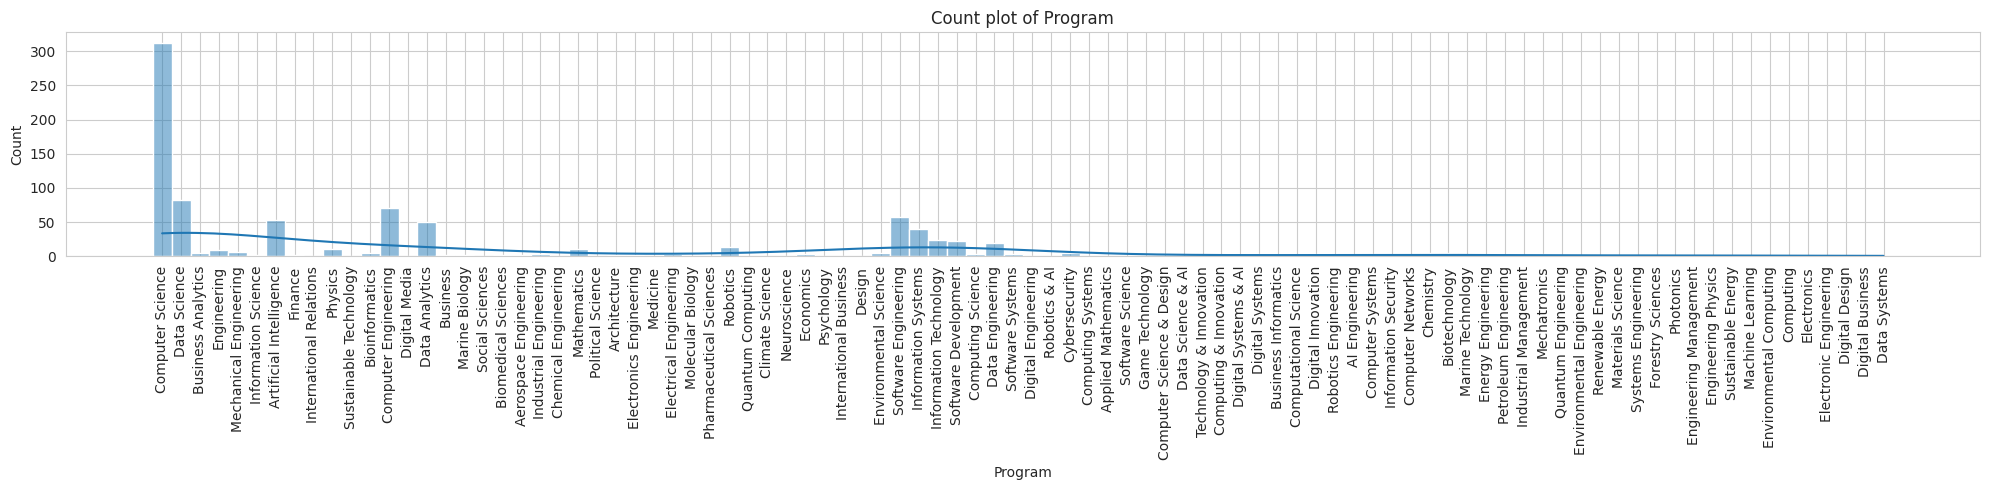

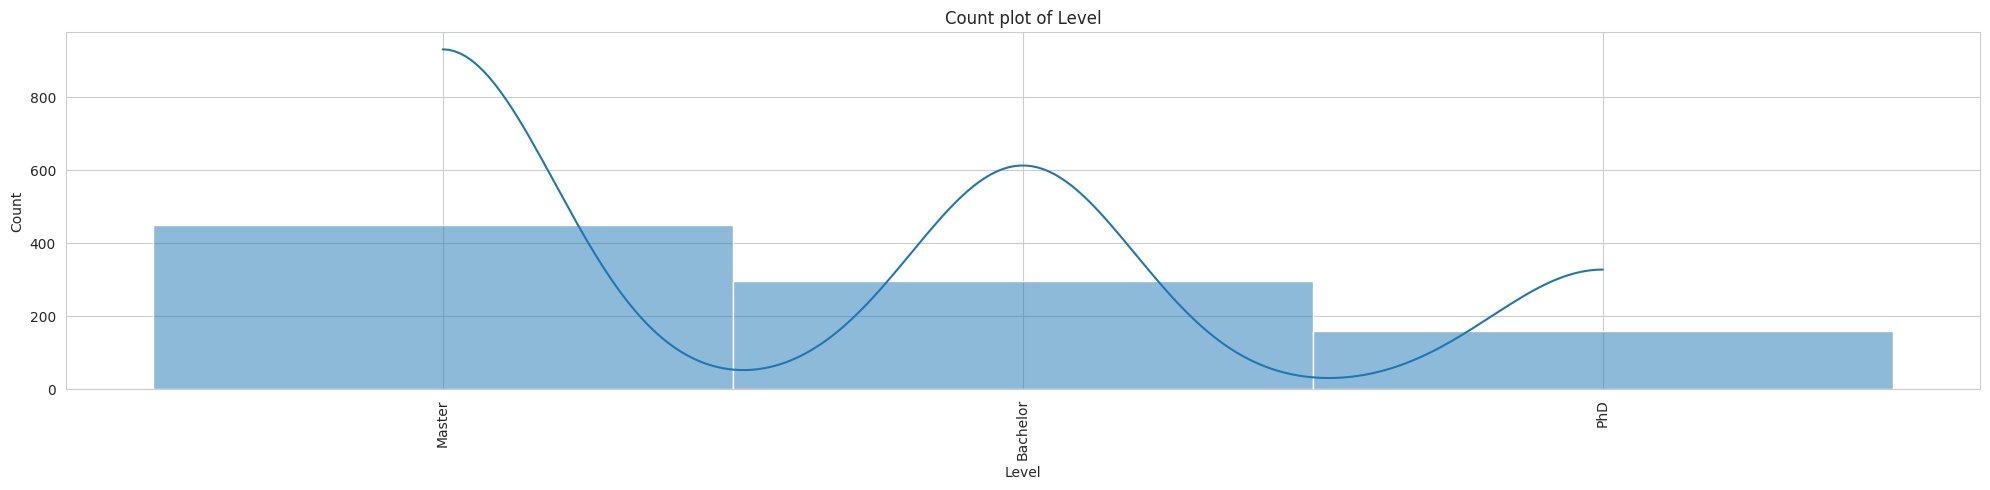

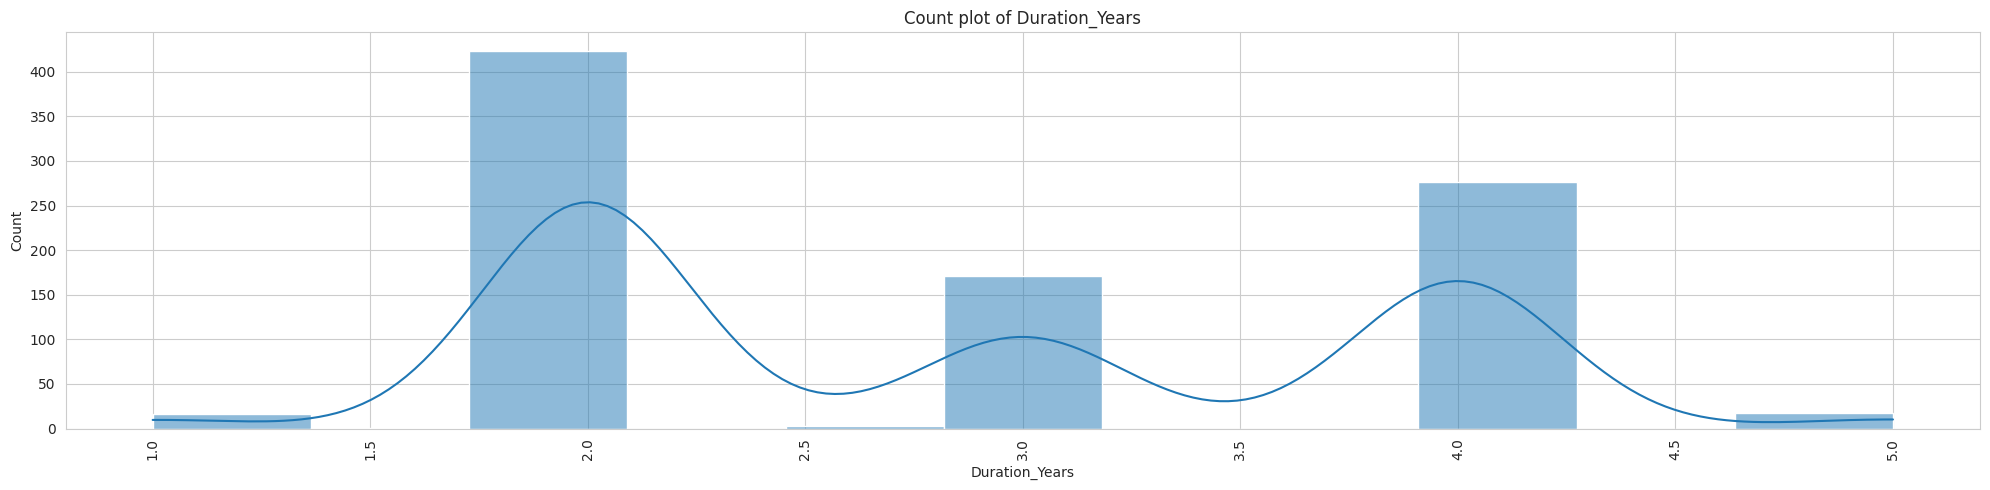

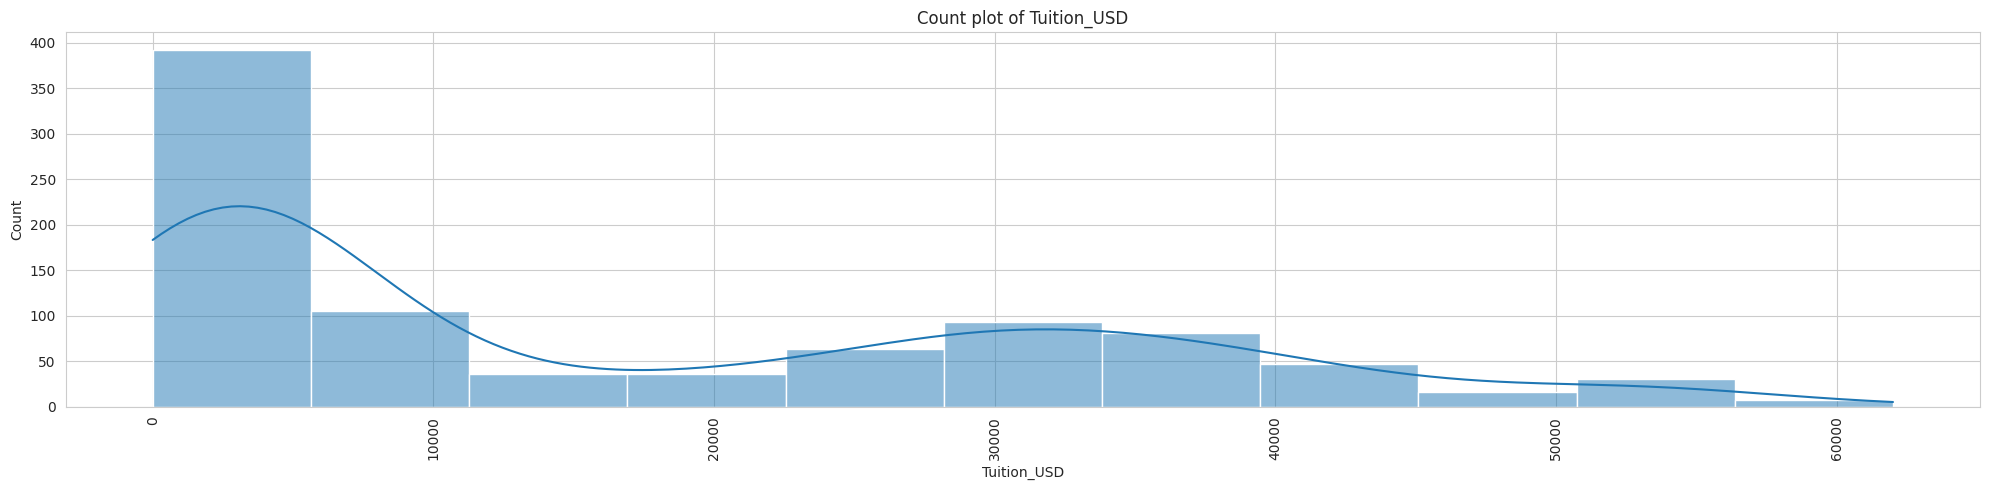

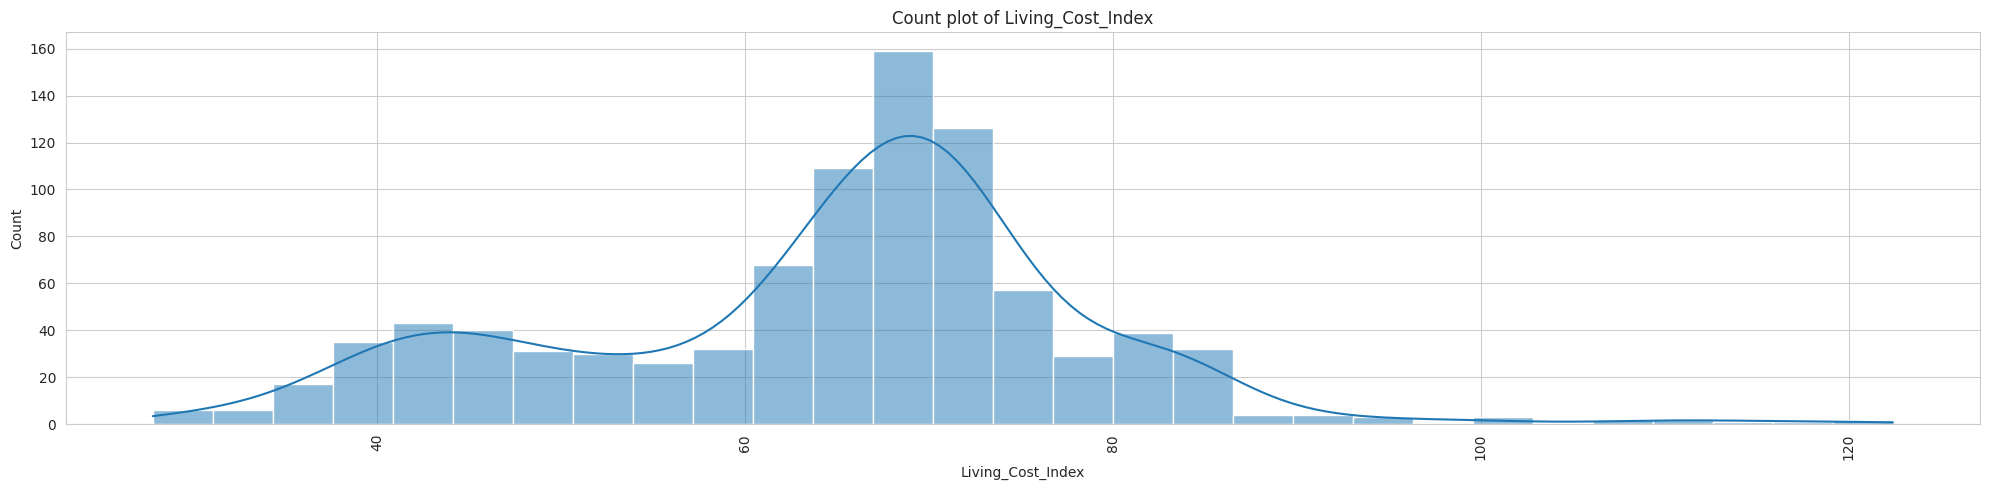

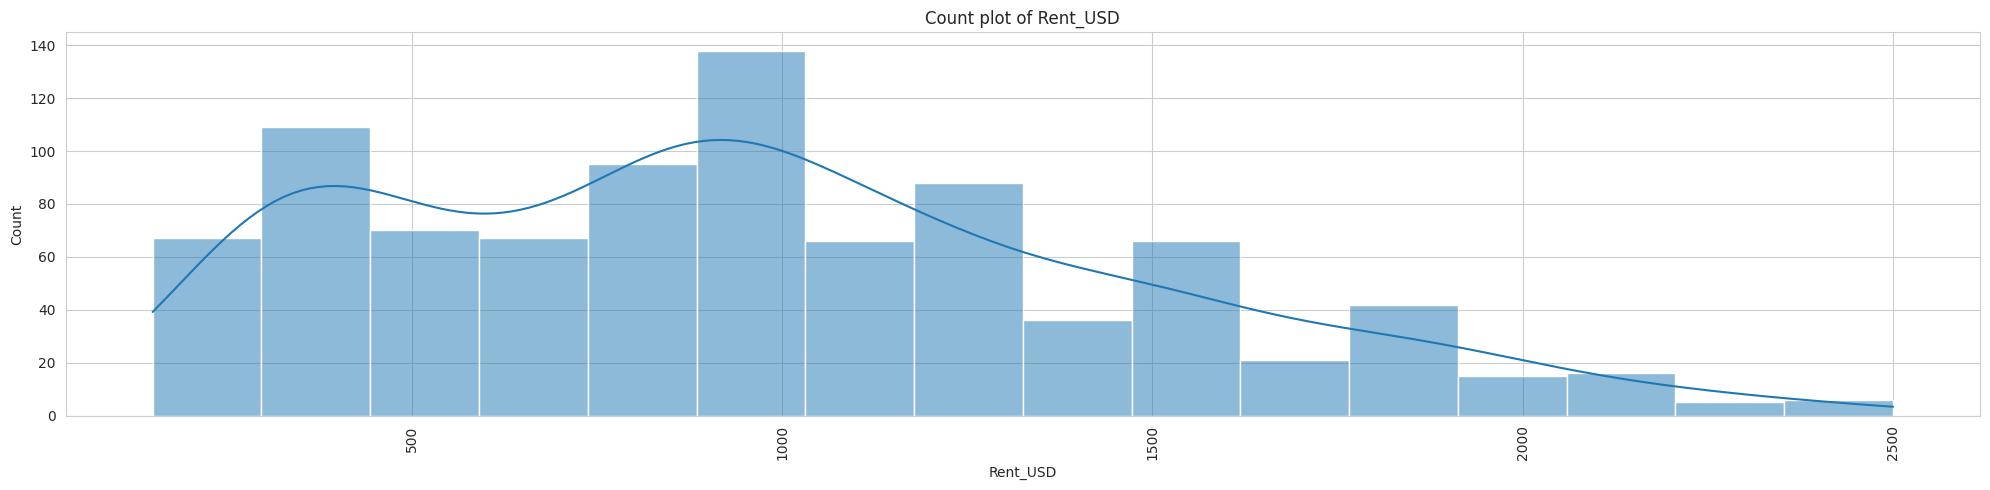

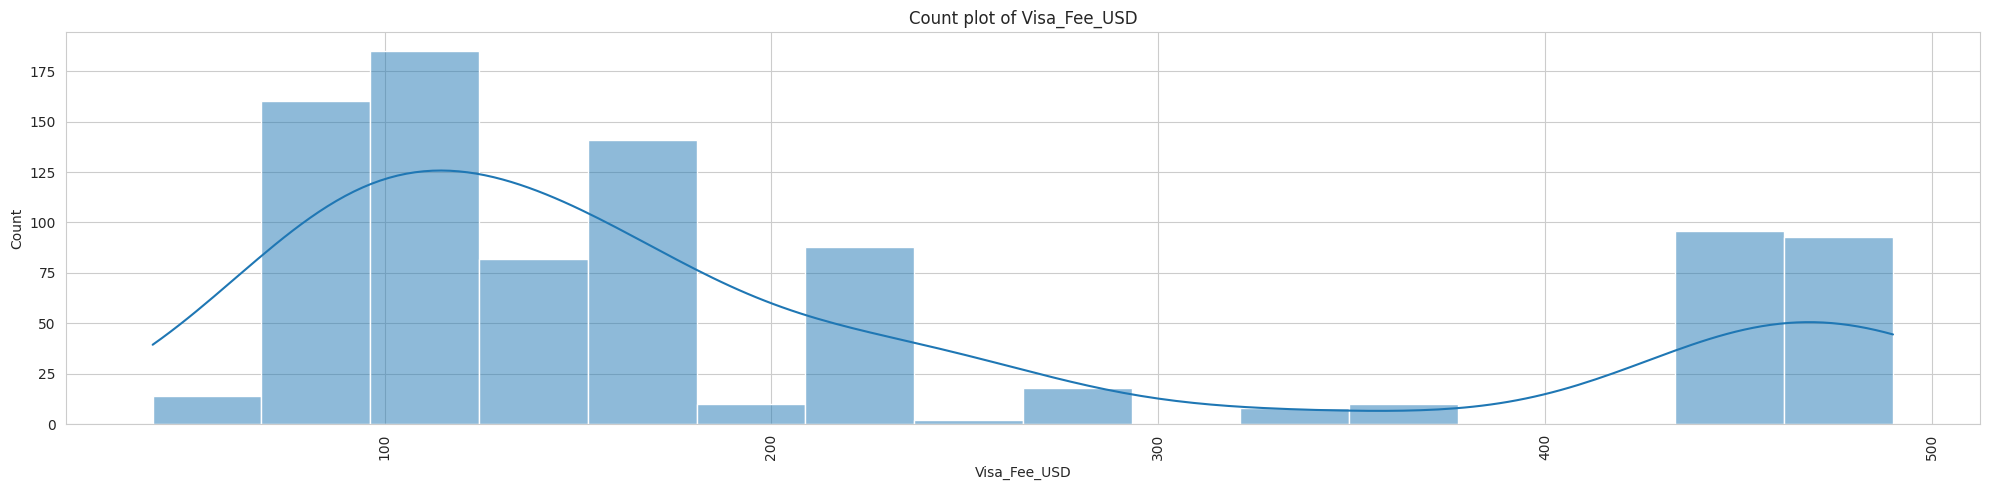

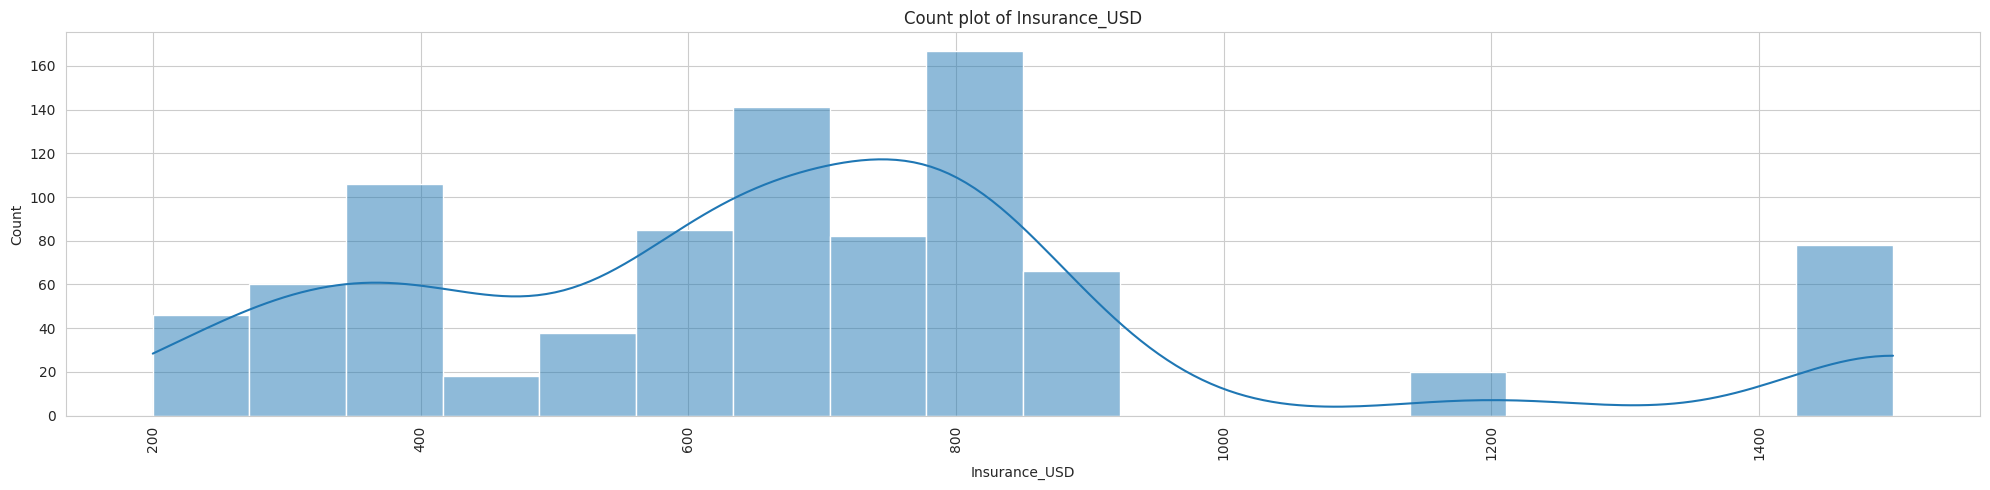

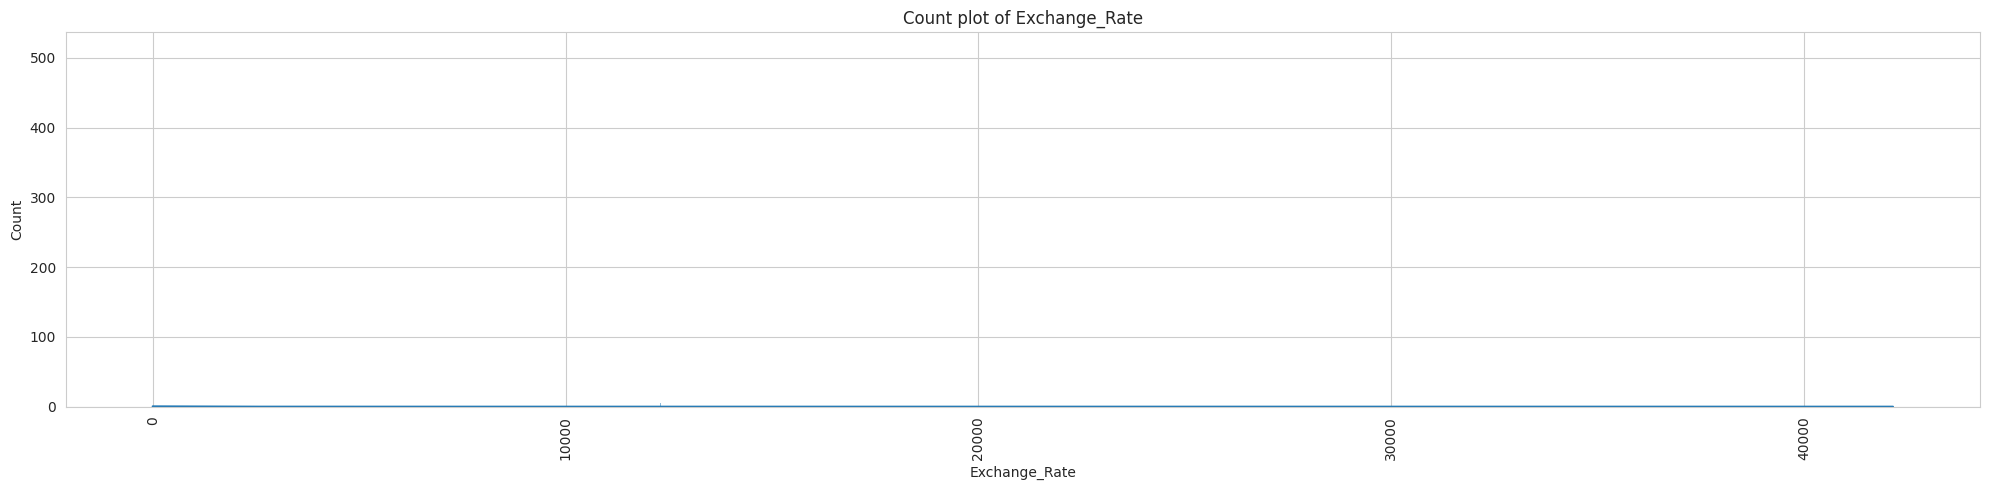

In [11]:
for features in cols2:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(df[features].dropna(),kde=True)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# # Correlation Matrix Before feature Engineering

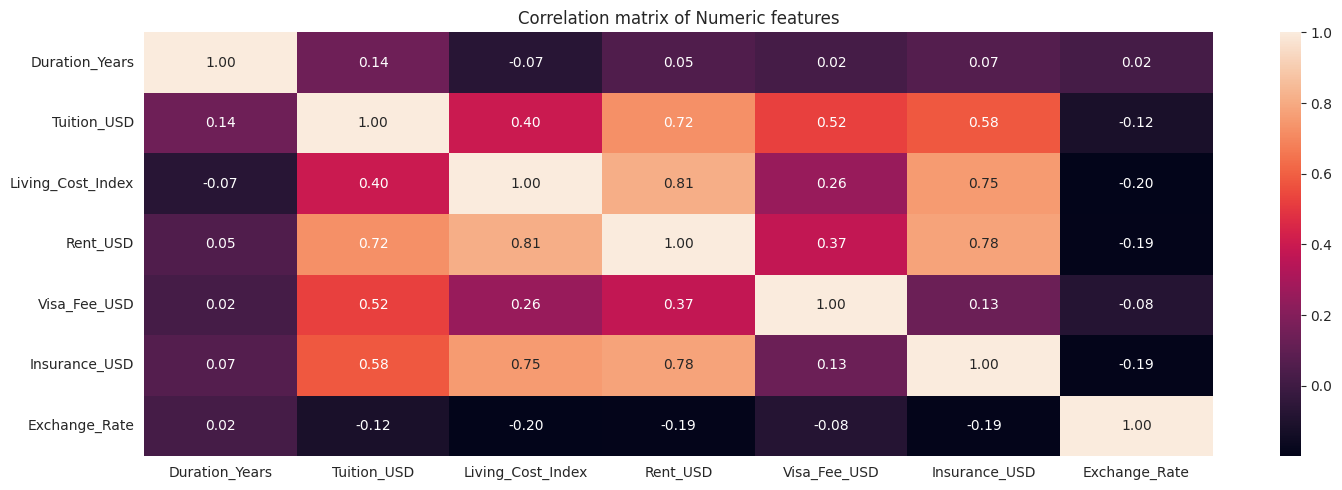

In [12]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=3:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot= True,fmt='.2f')
    plt.title(f'Correlation matrix of Numeric features')
    plt.tight_layout()
    plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [14]:
lab_col=['Country', 'City', 'University', 'Program', 'Level']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
for column in lab_col:
    df[column] = le.fit_transform(df[column])

# Correlation Matrix after feature Engineering

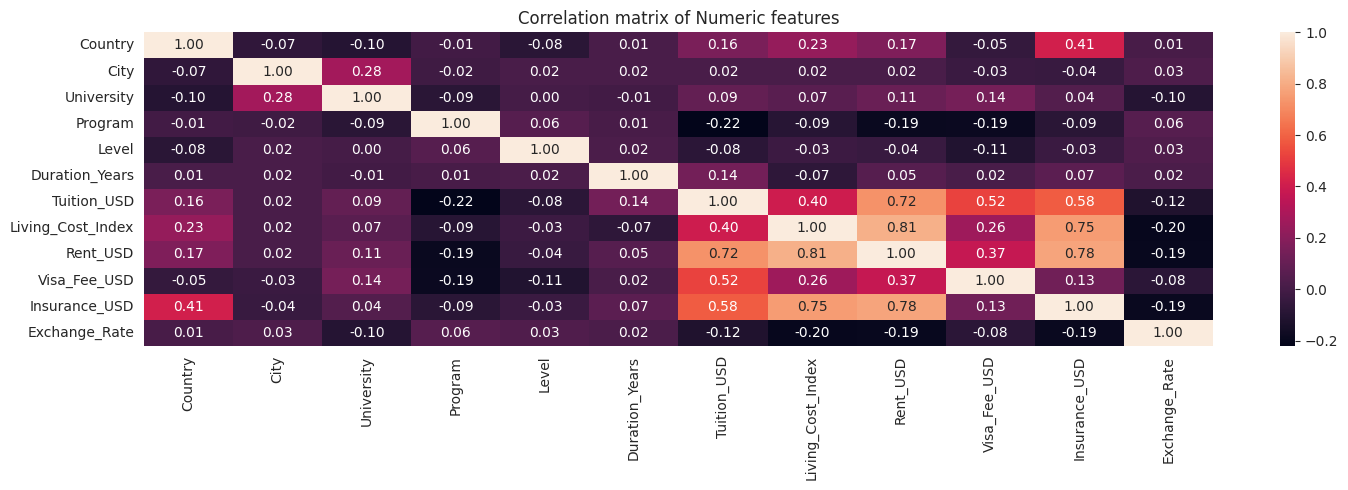

In [18]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=3:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot= True,fmt='.2f')
    plt.title(f'Correlation matrix of Numeric features')
    plt.tight_layout()
    plt.show()

In [19]:
df

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,66,84,101,17,1,2.0,55400,83.5,2200,160,1500,1.00
1,65,283,128,27,1,1.0,41200,75.8,1800,485,800,0.79
2,9,503,572,9,1,2.0,38500,72.5,1600,235,900,1.35
3,2,313,495,44,1,2.0,42000,71.2,1400,450,650,1.52
4,22,330,307,66,1,2.0,500,70.5,1100,75,550,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...
902,21,469,556,25,1,2.0,4000,70.2,1000,99,850,0.92
903,38,344,345,17,0,3.0,6800,50.5,400,120,400,4.65
904,51,12,154,57,1,2.0,4200,64.2,600,200,800,3.75
905,66,441,585,84,2,5.0,50000,77.8,2000,160,1500,1.00


# Model Section

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [21]:
X = df.drop(columns=['Living_Cost_Index'])
y = df['Living_Cost_Index']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)
}

In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [25]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

              Model  R2 Score      MSE    RMSE     MAE
5      RandomForest    0.9631   5.1918  2.2786  1.6601
9           XGBoost    0.9609   5.5103  2.3474  1.5135
6  GradientBoosting    0.9592   5.7496  2.3978  1.8475
4      DecisionTree    0.8988  14.2467  3.7745  2.0945
7          AdaBoost    0.8610  19.5709  4.4239  3.7129
8        KNeighbors    0.7928  29.1701  5.4009  3.9426
3        ElasticNet    0.7000  42.2420  6.4994  4.6668
0  LinearRegression    0.6991  42.3692  6.5092  4.6670
1             Ridge    0.6991  42.3669  6.5090  4.6669
2             Lasso    0.6968  42.6977  6.5343  4.7001


# Result Plot

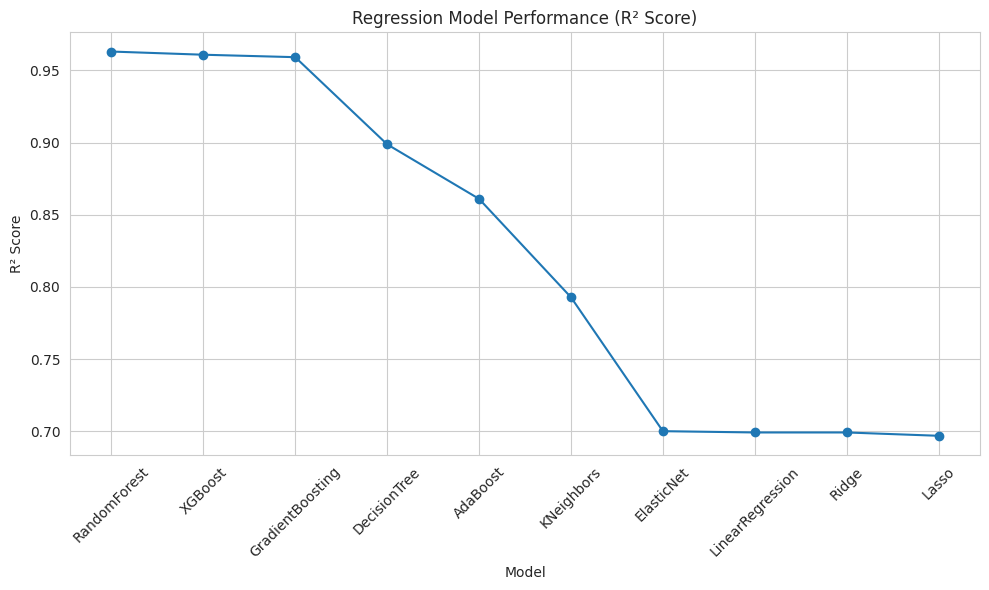

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Model'], results_df['R2 Score'], marker='o', linestyle='-')
plt.title('Regression Model Performance (R² Score)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion:
> High Chances of Overfit.